# Lab 3.2 Multiple Linear Regression


In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import scipy.io as sio
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

#### Load data. 
Make sure that you've put the file in your working directory.

In [2]:
# Read in a .csv file
data = pd.read_csv('pillows_example.csv')
data.tail()

,years,BLC_max,SLI_max
21,2006,761,1692
22,2007,99,597
23,2008,926,899
24,2009,439,935
25,2010,553,1023


#### Remember, it's always good to plot your data first. Create figures.

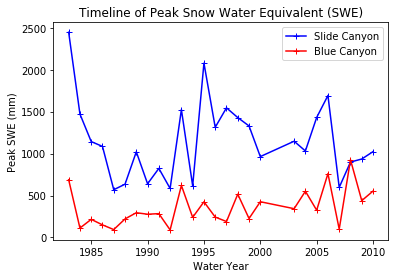

In [3]:
plt.plot(data['years'],data['SLI_max'],'b-+', label='Slide Canyon');
plt.plot(data['years'],data['BLC_max'],'r-+', label='Blue Canyon');

plt.title('Timeline of Peak Snow Water Equivalent (SWE)')
plt.xlabel('Water Year')
plt.ylabel('Peak SWE (mm)');
plt.legend(loc="best")

#### What does the above plot show?
What you see above is a plot of the maximum value of snow water equivalent (SWE) measured at two snow pillows (these weigh the snow and convert that weight into the water content of the snow).
These measurements of snow are not too far from each other geographically (both in the Sierra Nevada, California, although Slide Canyon is at a higher elevation and further south), and we might expect that more snow at one site woud correspond to more snow at the other site as well.  We can check this by examining a regression between the data at the two sites.

#### The first step to any regression or correlation analysis is to create a scatter plot of the data.


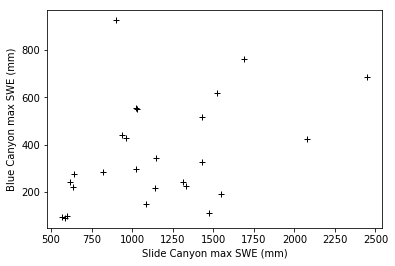

In [4]:
plt.plot(data['SLI_max'],data['BLC_max'],'k+');
plt.xlabel('Slide Canyon max SWE (mm)')
plt.ylabel('Blue Canyon max SWE (mm)');

#### Linear regression
The plot above suggests that this is a borderline case for applying linear regression analysis.  What rules of linear regression might we worry about here?  Take a look at your lecture notes.

We will proceed with calculating the regression and then look at the residuals to get a better idea of whether this is the best approach.

In [5]:
n = data['SLI_max'].size;
B1 = (n* np.sum(data['BLC_max']*data['SLI_max']) - np.sum(data['BLC_max'])*np.sum(data['SLI_max']))/(n* np.sum(data['SLI_max']**2) - (np.sum(data['SLI_max']))**2);
B0 = np.mean(data['BLC_max']) - B1*np.mean(data['SLI_max']);

x = np.linspace(np.min(data['SLI_max']), np.max(data['SLI_max']),n)
y = B0 + B1*x

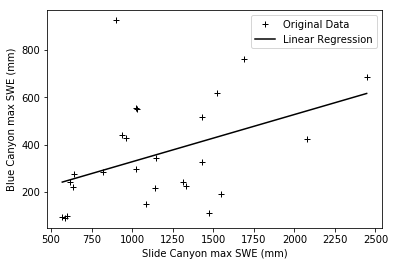

In [6]:
plt.plot(data['SLI_max'],data['BLC_max'],'k+',label='Original Data');
plt.xlabel('Slide Canyon max SWE (mm)')
plt.ylabel('Blue Canyon max SWE (mm)')
plt.plot(x,y,'k-',label='Linear Regression');
plt.legend()

#### Calculate the residuals of this linear regression fit

In [7]:
resid = data['BLC_max'] - (B0 + B1*(data['SLI_max']));

#### Now, what do we need to be examining regarding the residuals?
From the lecture notes:
* Data should not be strongly auto correlated (more on this next week),
* There shouldn’t be any dramatic expansion in the variance over time.
* A linear model should fit reasonably well (use a scatter plot to confirm)
* The residuals for the linear model should be approximately normally distributed
* The residuals shouldn’t have large trends in them (plot these to get a sense of whether there are problems).

#### For now, don't worry about auto-correlation.  We made a scatter plot above, so now we should plot to see a) if the residuals look approximately normally distributed, and b) if the residuals have a trend in them.


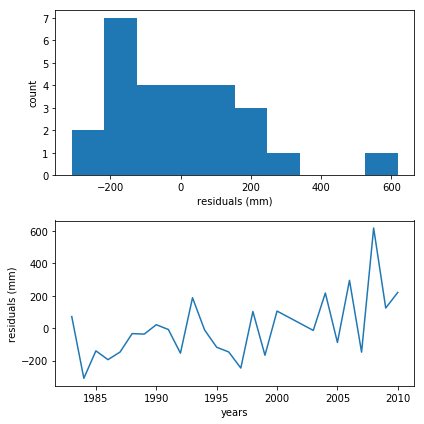

In [8]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(6,6))
ax1.hist(resid)
ax1.set_xlabel('residuals (mm)')
ax1.set_ylabel('count')


ax2.plot(data['years'],resid)
ax2.set_xlabel('years')
ax2.set_ylabel('residuals (mm)')

f.tight_layout()

#### Looking at these plots, what do you think?  Is our linear regression okay?
When I look at the plot above, I think that with the exception of one outlier point at 600, the residuals do look approximately normally distributed.  (I'm personally inclined to ignore the outlier because I work with snow pillow a lot and know that they break periodically.  You have to make a judgement call about your own data.)

I also see that the residuals look like they might have a trend in time, so I want to test for the significance of this trend.

#### To test for the significance of the trend:

Test for positive slope

Is there a significant positive relationship between snow depth at SLI and BLC?

In [9]:
## Test for positive slope
SSE = np.sum((B0 + B1*data['SLI_max'] - data['BLC_max'])**2);

standard_err = np.sqrt(SSE/(n - 2));

s_B1 = np.sqrt(standard_err**2 / (np.sum((data['SLI_max'] - np.mean(data['SLI_max']))**2)));

t_95_24 = 1.711;

t = B1/s_B1;

print(t)

2.2996284181716447


So, with 95% confidence, there is a trend to this data, and we ought to consider it as part of our regression analysis.

#### Before moving on, let's demonstrate another way you could do simple linear regression.
You can instead use a numpy function to perform the same linear regression that you did manually

In [10]:
# Read the documentation
np.polyfit?

In [23]:
data['SLI_max'].dtype

dtype('int64')

In [11]:
Bv2 = np.polyfit(data['SLI_max'],data['BLC_max'],1)
print(Bv2)

x = np.linspace(np.min(data['SLI_max']), np.max(data['SLI_max']),n)
y = Bv2[1] + Bv2[0]*x

[  0.1996806  127.91431327]


Note that we output just the polynomial coefficients here.  When you look at the documentation, you can tell that you could also output other things, like the residuals, using this function.

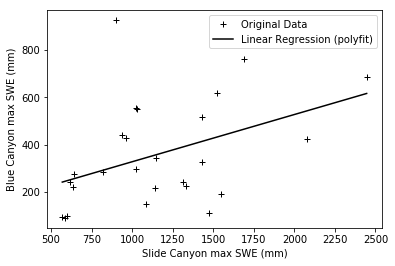

In [12]:
plt.plot(data['SLI_max'],data['BLC_max'],'k+',label='Original Data');
plt.xlabel('Slide Canyon max SWE (mm)')
plt.ylabel('Blue Canyon max SWE (mm)')
plt.plot(x,y,'k-',label='Linear Regression (polyfit)');
plt.legend()

Again, this is not a great fit, but we have reason to suspect that the trend in the data might explain part of the problem.  More on that in a bit.

#### Let's check the correlation coefficient for our two snow measurements

Note that numpy.corrcoef only gives you the R values, not P

This gives a matrix of results. These are correlation of x with itself (should be 1), of x with y, of y with x, and of y with itself (should be 1) 

In [13]:
# Read the documentation
np.corrcoef?

In [14]:
Sxy = np.sum((data['SLI_max']-np.mean(data['SLI_max']))*(data['BLC_max']-np.mean(data['BLC_max'])));
r = Sxy / (np.sqrt(np.sum((data['SLI_max']-np.mean(data['SLI_max']))**2)) * np.sqrt(np.sum((data['BLC_max']-np.mean(data['BLC_max']))**2)));

# np.corrcoef only gives you the R values, not P
R = np.corrcoef(data['SLI_max'],data['BLC_max']);
print(R)

[[1.        0.4249234]
 [0.4249234 1.       ]]


#### The correlation above doesn't look particularly high, particularly if you square it (which is an indicator of "the variance explained").  How do we know if this correlation is statistically significant?

Another function: scipy.stats.pearsonr will give us a single R and P value

P gives you the corresponding p-values to determine the significance of the correlation

In [15]:
# Read the documentation
st.pearsonr?

In [16]:
R, P = st.pearsonr(data['SLI_max'],data['BLC_max'])
print(R)
print(R*R)
print(P)

0.4249234045616491
0.18055989974426292
0.03047392304371896


This is telling us that while our correlation isn't particularly strong, it is significant at the 95% confidence interval.  (Note also that it would _not_ be significant at the 99% confidence interval.)

#### Now we return to our observation that our data had a temporal trend by applying Multiple Linear Regression

Note:  The code below works, but Jessica will add more comments about what is happening later.  Please download this lab again for more comments here.  Thank you!
    

In [17]:
from scipy.linalg import lstsq

# Read the documentation
lstsq?

In [18]:
Xmulti = np.array([ data['SLI_max'],
                   np.linspace(1,data['years'].size,data['years'].size),
                   np.ones_like(data['years'])]).T
print(Xmulti.shape)
print(data['BLC_max'].shape)

(26, 3)
(26,)


In [19]:
B, res, rnk, s = lstsq(Xmulti, data['BLC_max'])
print(B)

[  0.22156219  13.77959269 -83.33208798]


Plot the the result of the two different regression methods.

Note that you will need to use the function np.dot()

In [20]:
# Read the documentation
np.dot?

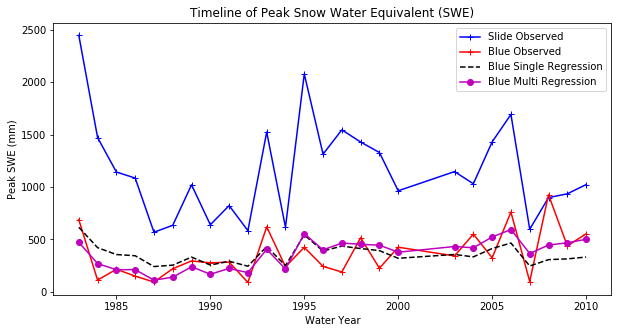

In [21]:
# Original data:
plt.figure(figsize=(10,5))
plt.plot(data['years'],data['SLI_max'],'b-+', label='Slide Observed');
plt.plot(data['years'],data['BLC_max'],'r-+', label='Blue Observed');

# Predicted with linear regression between Slide Canyon and Blue Canyon
plt.plot(data['years'],B0 + B1*data['SLI_max'],'k--', label='Blue Single Regression')
plt.plot(data['years'],Xmulti.dot(B),'m-o', label='Blue Multi Regression')

plt.legend()
plt.title('Timeline of Peak Snow Water Equivalent (SWE)')
plt.xlabel('Water Year')
plt.ylabel('Peak SWE (mm)');

Cumulative Difference

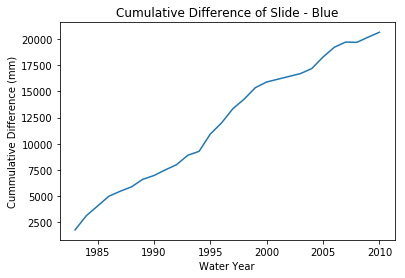

In [22]:
f, ax = plt.subplots(1)
ax.plot(data['years'], np.cumsum(data['SLI_max'] - data['BLC_max']))
ax.set_title('Cumulative Difference of Slide - Blue')
ax.set_ylabel('Cummulative Difference (mm)')
ax.set_xlabel('Water Year');